# Adversarial Search: Playing Connect 4

Student Name: Max Link 

I have used the following AI tools: ChatGPT 

I understand that my submission needs to be my own work: ML 

## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

## Definitions: 

**Initial State:** The initial state is an empty board, with no discs in play. This means that all seven columns are empty. 

**Actions:** The player can drop a disc (red or yellow depending on their side) into one of seven columns. 

**Transition model:** Once a player drops a disc in a row, the board changes to accomodate that disc. This means that the transition model is a changing of column state from empty to filled. Blocking the other player can be considered here. 

**Goal State:** Once one side (either red or yellow) create a horizontal, vertical, or diagonal line of four discs, the game is over. 

**How big is the state space? Give an estimate and explain it.**

The state space is seven columns by six rows of available options. The columns can be represented by c and the rows can be represented by r. This means that the state space is c x r big. We know that every board spot can be either: 

1. empty 
2. filled with red's piece 
3. filled with yellow's piece 

This gives us: c x r = 7 x 6 = 42 and each of the 3 states can take on one of these 42 possibilities. 

So the state space size is roughly 3^42.  

**How big is the game tree that minimax search will go through? Give an estimate and explain it.**

The game tree represents all possible sequences of moves starting from the initial board state to all possible game endings. This tree houses the different board configurations (states) and also houses the different paths to get to these states (seq. of moves), so the size of this tree can be significantly larger than the state space size. 

Terminology: Branching factor is the average number of moves available from any given board state. Varies depending on the amount of empty columns. At the start there are 7 possible  moves because there are 7 possible columns, but the branching factor decreases as the columns are filled up. Depth of the tree is the average number of moves in a typical game. Connect 4 games rarely use all 42 spots because games usually end when one player gets four in a row. Common averages are 20-30 moves before ending. Lets assume depth is 20 for our problem. 

The game tree that minimax search will go through is roughly 4^20. To get this number, we raised the average branching factor to the power of the depth. This assumes that the average branching factor over the course of the game is about 4, as the game progresses and fewer columns are available to play. This also assumes that the average game length (depth of the tree) is about 20 moves. 

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [138]:
# import numpy for array manipulation 
import numpy as np

# this function creates an empty board 
# the empty board has a shape parameter, which is x, y 
# x here is 6, representing the 6 columns 
# y here is 7, representing the 7 columns 
def empty_board(shape=(6, 7)):
    # np.full creates a multidimensional array 
    # this multidimensional array is 6x7, meaning it has 6 row and 7 columns 
    # every value in each row is filled with a zero with the fill_value=0 parameter 
    return np.full(shape=shape, fill_value=0)

# display the empty board with a print statement below 
print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

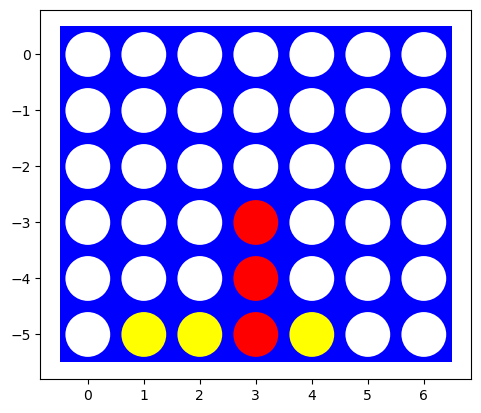

In [139]:
# Visualization code by Randolph Rankin
# -1 is yellow 
# 1 is red 

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

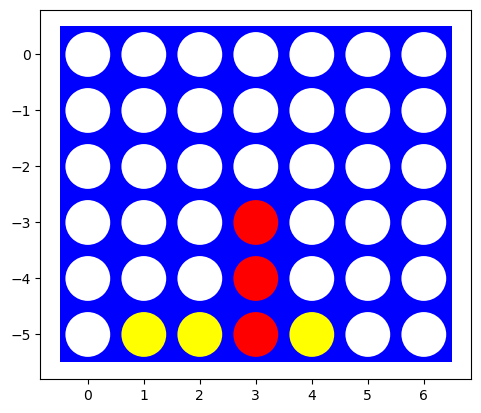

In [140]:
# custom visualization function for numpy arrays 

import matplotlib.pyplot as plt

def visualize_numpy(board):
    plt.axes()
    rectangle = plt.Rectangle((-0.5, len(board) * -1 + 0.5), len(board[0]), len(board), fc='blue')
    circles = []
    for i in range(board.shape[0]):  # using shape to iterate over numpy array
        for j in range(board.shape[1]):
            val = board[i, j]  # accessing the element directly as a scalar
            color = 'white' if val == 0 else 'red' if val == 1 else 'yellow' if val == -1 else 'black'  # Added black for unexpected values
            circles.append(plt.Circle((j, i * -1), 0.4, fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

# example usage with a numpy array
board = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, -1, -1, 1, -1, 0, 0]
])
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(s)`.
* The transition model `result(s, a)`.
* Check for terminal states `terminal(s)`.
* The utility function `utility(s)`.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

In [141]:
# 4x4 board test 
# empty board 
board = [[0, 0, 0, 0], 
         [0, 0, 0, 0], 
         [0, 0, 0, 0], 
         [0, 0, 0, 0]]

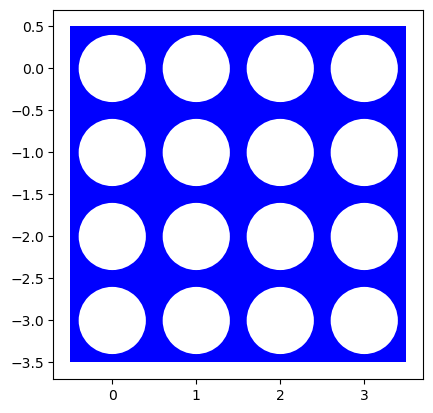

In [142]:
# visualize empty board 
visualize(board)

In [143]:
# filled 4x4 board 
filled_4 = [[0, 1, 0, -1], 
         [-1, 1, 0, 0], 
         [-1, 1, 0, 0], 
         [-1, 1, 0, 0]]

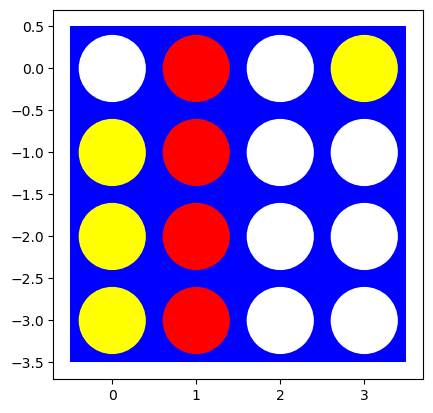

In [144]:
# visualize filled 4x4 
visualize(filled_4)

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [145]:
# for board array manipulation 
import numpy as np 

# import sys for sys.exit 
import sys

In [146]:
# function to check for win conditions - 4 in row, 4 in column, 4 in diagonal 

# function to check for columns: 
def col_checker(board): 
    # initialize state to 0 because the game by default is not won 
    state = 0 
    # the way the player won made global 
    move = ""
    # get the length of the board
    # for 4x4 should be 4 becauase len takes the vertical length 
    n = len(board)
    # empty list for holding found column   
    column = [] 
    # generate comparison array of 1's 
    # dynamic array allocation with n 
    # win state changes based on player 
    # n is the amount of columns, filling each column with only a single 1 to make a 1 row 
    # np.ones makes a matrix by default so index at 0 to just get one array for our comparison  
    win_state1 = np.ones((1, n), dtype = int) 
    # negative win state
    # np.full makes a matrix by default so we must index at 0 to just get one array for our comparison 
    win_state2 = np.full((1, n), -1) 
    # check every row of the board 
    # iterate through all columns 
    for n in range(n): 
        column += [board[:, n]]
        # use list comprehension to flatten into a list 
        flat_list = [item for sublist in column for item in sublist]
        # convert flat_list from a list to a numpy array for comparison against win_state1 and win_state2 
        flat_array = np.array(flat_list) 
        # print("flat list: ", flat_array)
        # print("win state1: ", win_state1)

        # use np.array_equal to compare arrays
        if(np.array_equal(flat_array, win_state1[0]) or np.array_equal(flat_array, win_state2[0])): 
                # print("entered if!") 
                state = 1  
                # the way the player won 
                move = "four down"
        # erase column for next loop through 
        column = []
            
    return state, move  

In [147]:
# function to check for rows: 
def row_checker(board):

    # real logic 
    # initialize state to 0 because the game by default is not won 
    state = 0 
    # get the length of the board
    # for 4x4 should be 4 becauase len takes the vertical length 
    n = len(board)
    # the way the player won made global 
    move = ""
    
    # get the shape of board 
    # r is the length of the rows on the board 
    r = board.shape[1]
    # print('r:', r) 
    # generate comparison array of 1's 
    # r is for dynamic array of 1 allocation based on board size 
    # r is the amount of columns, filling them with 1's
    # np.ones defaults to making a matrix, so to get a single array we will have to index 0 
    win_state1 = np.ones((1, r), dtype = int)
    # negative win state 
    # np.full for general fill 
    # np.full defaults to making a matrix, so to get a single array we will have to index 0 
    win_state2 = np.full((1, r), -1) 
    # print("win_state:", win_state) 
    # check every row of the board 
    # 0-3 range for row 
    for row in range(n): 
        # print("this is the row being compared: \n", board[row])
        # print("win state:\n ", win_state1[0])
        # if the game is won, set state to 1 
        # compare using np.array_equal to compare each element of the arrays to each other 
        # if they are equal enter the if statement 
        # this may not be okay to compare arrays directly. 
        # if state is not one 
        if(np.array_equal(board[row], win_state1[0]) or np.array_equal(board[row], win_state2[0]) and state != 1):
            # print("state updated!") 
            state = 1 
            # the way the player won 
            move = "four across"
            # print("State: ", state) 

    return state, move 


In [148]:
def diagonal_check(board, player):
    # print("the board for this comparison is: \n", board) 
    # move for user understanding 
    move = "diagonal"
    # extract the diagonal using np built in diagonal function 
    main_diagonal = np.diagonal(board)
    
    # get the antidiagonal 
    # flips the array horizontally with a left right flip 
    anti_diagonal = np.diagonal(np.fliplr(board))
    
    # check if the main diagonal is all positive ones 
    if np.all(main_diagonal == 1): 
        # print("the main diagonal contains ones!")
        state = 1 
        return state, move
    # main diagonals that contain only -1's  
    elif np.all(main_diagonal == -1): 
        state = 1 
        return state, move 
    # check if the anti_diagonal is all positive ones 
    # np.all compares to a certain condition of 1 or -1 
    elif np.all(anti_diagonal == 1): 
        # print("the anti_diagonal contains ones!")
        state = 1 
        return state, move 
    # anti-diagonals that contain only -1 
    elif np.all(anti_diagonal == -1): 
        state = 1 
        return state, move 
    # no diagonals found 
    else: 
        # print("no diagonals found")
        state = 0 
        return state, move 

In [149]:
# draw check 
def draw_check(board, player): 
    move = "draw"
    state = 0 
    
    # check if np array is completely full, if so set terminal state to 1
    # np.all takes the numpy array & checks that every element in it does not equal 0 
    # since this is our last board state check out of all four win conditions, then we just have to make sure the board is full of non-zero elements 
    if(np.all(board != 0)): 
       state = 1 
    
    # return the state and the move 
    return state, move 

In [150]:
# state_check function for main state check flow 

def state_check(board, player): 
    # assign player name to player number 
    if player == 1: 
        player = "red"
    else: 
        player = "yellow"
    # starting values for terminal condition 
    # start as 0 because no one has won the game yet 
    # 1 when game won: either 4 in a row, 4 in a column, or 4 diagonally  
    terminal_state = 0 
    # the state the players win by 
    state = " "
    # print("State:" , state) 
    # check if the game is won 
    # analyze all rows for four 1 or -1 
    # analyze all columns for four 1 or -1 
    # how do we do diagonals? start on a row and move in until you find 1 or -1
    # finding 1 or -1 determines which should be checked, then go to the next row 
    # on the next row, go one further than you went on the first row.... repeat until 4 hit
    # check rows - works  
    terminal_state, state = row_checker(board) 
    
    # if win condition met 
    if(terminal_state == 1): 
        # print(player, " won via ", state, "! Ending game.")
        return terminal_state
    
    # check columns 
    terminal_state, state = col_checker(board)
    
    # if win condition met 
    if(terminal_state == 1): 
        # print(player, " won via ", state, "! Ending game.")
        return terminal_state
    
    # check diagonal 
    terminal_state, state = diagonal_check(board, player) 
    
    # if win condition met 
    if(terminal_state == 1): 
        # print(player, " won via ", state, "! Ending game.")
        return terminal_state
    
    # draw state 
    terminal_state, state = draw_check(board, player)
    
    # if win condition met 
    if(terminal_state == 1): 
        # print("Draw. Ending game.")
        return terminal_state
    # if none of the conditions are met then return 
    return terminal_state


In [151]:
# np test board 
np_b = np.zeros((4, 4), dtype = int)  

In [152]:
# function for placing a piece 
def place_piece(board, player): 
    # bare bones placement code 
    length = len(board)

    # define column to search through here 
    # col can range from 0 - 3 
    col = np.random.randint(0, length)

    # set to 3 to start from bottom & subtract to go up a column 
    row = 3

    # add one to column_selected to have the first column identify as 1, second as 2, 3rd as 3 etc. 
    # print("initiaitng count for the entire ", column_selected + 1, " column")
    for r in range(length): 
        # print("row is: ", row)
        # test with random column instead of fixing at 1 
        # col = 1 
        # count conditional incremented here after checking if there is a 1 or -1 already placed & finding an empty spot 
        if board[row][col] == 1 or board[row][col] == -1: 
            # print("a 1 has been found in col ", col + 1)
            # one_count += 1 
            # decrement row to go up the row to find an empty spot 
            row -= 1 
            # print("row decremented: ", row)
            # row starts as 3 & should only decrement as low as zero 
            # if row gets to -1 then that means that an entire column is full 
            # in this case, the place_piece() function should be recursively called to run again 
            if(row == -1): 
                # print("going over column! Go to a diff column!")
                place_piece(board, player) 
        # else, found a zero
        # if you have found a zero then just place a 1 or -1 
        else: 
            # player will either be 1 or -1 depending on who is playing 
            # this can be used as the piece placement 
            board[row][col] = player 
            # as soon as place, then exit 
            break
    # returns modified board 
    return board

In [153]:
# in a traditional game of connect 4, red goes first 
# player has default value 1, signifying red 
# yellow is -1 value for player
# player set to 1 by default so that red can go first 
# pass a running row variable to simulate gravity 
def random_player(board, player = 1): 
    # print("randomly playing!")
    
    # make a copy of board 
    new_board = board.copy() 

    # code 
    if player == 1: 
        # print("Red's turn") 
        updated_board = place_piece(board, player)
        # new_board[row][col] = 1      
        new_board = updated_board
    else: 
        # print("Yellow's turn")
        updated_board = place_piece(board, player)
        new_board = updated_board
    # return the randomly updated board & the player 
    return new_board, player 

In [154]:
# make the 4x4 board of zeros with numpy array -- visualization function had to be customized to display numpy arrays but easier 

# 4 rows & 4 columns 
# initialized as np array so that the .shape check and other mechanics will work in the state_check() function 
board = np.zeros((4, 4), dtype = int)  

# visualize_numpy(board)


In [155]:
# basic game flow 

# win condition for exiting loop 
terminal_state = 0 

# while loop - game logic 
while True:
    # red goes first 
    # player is red by default in random_player, so do not pass anything in for player 
    board, player = random_player(board)
    
    # print(board)
    
    # check state - state_check will end the game if a disc is in four adjacent spots 
    # pass in the player for this check to know if you need to check for 1 or -1 
    terminal_state = state_check(board, player)
    
    # break out if win_state met 
    if(terminal_state == 1): 
        break; 

    # yellow goes second 
    yellow = -1 
    board, player = random_player(board, yellow)
    
    # print(board)

    # check state - state_check will end the game if a disc is in four adjacent spots 
    # pass player for this check like above 
    terminal_state = state_check(board, player) 
    
    # break out if win_state met  
    if(terminal_state == 1): 
        break; 
    
    # increment count 
    # count+=1
    
    
# print("new board\n", board)

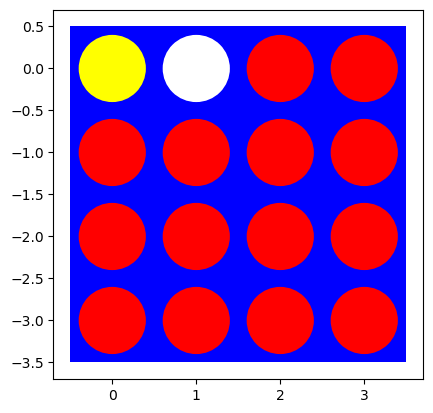

In [156]:
# ------ TESTING FOR OVERLAPPING PLACEMENT OF PIECES ------# 
player = -1 

# make a board of all red and try to place a yellow 
placement_test = np.ones((4, 4), dtype = int)  

# only one empty spot 
placement_test[0][0] = 0 
placement_test[0][1] = 0

# now the place function should never go to position 3, 3
place_piece(placement_test, player)

visualize_numpy(placement_test)

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [157]:
# initialize play_board 
play_board = np.zeros((4, 4), dtype = int)

In [158]:
def switch_player(player): 
    # if the player is red, switch to yellow 
    if player == 1: 
        # switch 
        player = -1
        # return yellow  
        return player 
    else: 
        # switch to red 
        player = 1 
        # return red 
        return player 
    

In [159]:
# red and yellow play against each other 25 times 
def play(N = 1000):  
    # integers to understand how often each player wins 
    win_yellow = 0
    win_red = 0
    
    # loop through the amount of times you can play 
    for i in range(N): 
        # i is zero indexed so start at 1 for easy round logging 
        # print("round: ", i+1)
        # initialize an empty board 4x4 
        play_board = np.zeros((4, 4), dtype=int)
        # player starts as red 
        player = 1 
        
        while True: 
            # play_board gets updated because red plays
            play_board, player = random_player(play_board, player)
            # visualize board after each play 
            visualize_numpy(play_board)
            # check if they win 
            # returns state = 0 if game is not done 
            win = state_check(play_board, player) 
            # print("win:", win)
            # if win does not equal zero then the game is won!
            if win != 0: 
                if player == 1: 
                    win_red += 1 
                else: 
                    win_yellow += 1 
                # print("round", i+1, " won!")
                # exit loop because game is over 
                break 
            # if game is not won, then switch player 
            player = switch_player(player)
    # return the win amounts for each player 
    return win_red, win_yellow
            

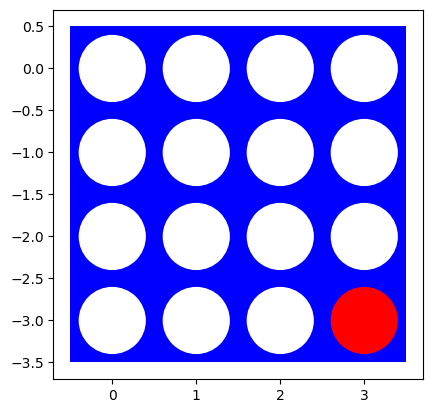

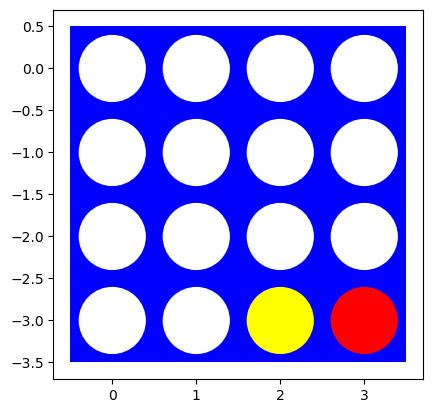

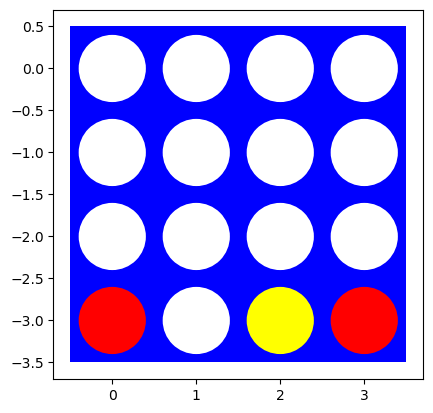

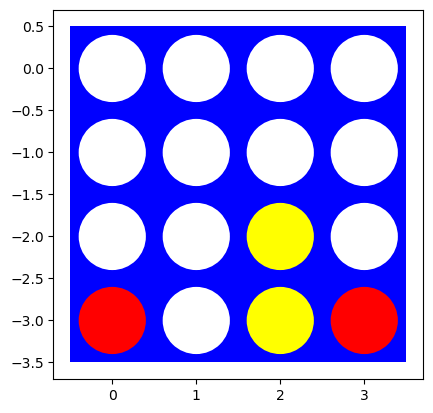

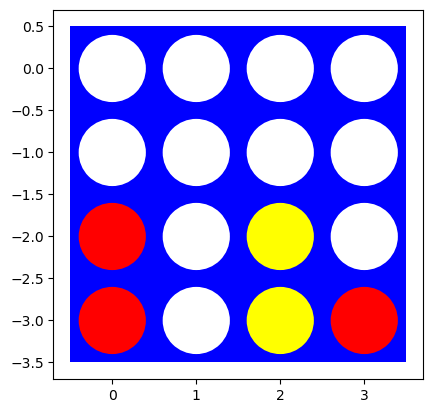

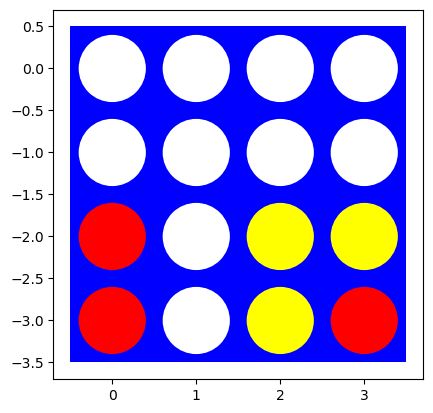

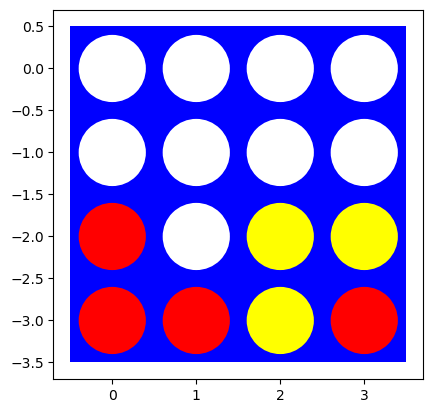

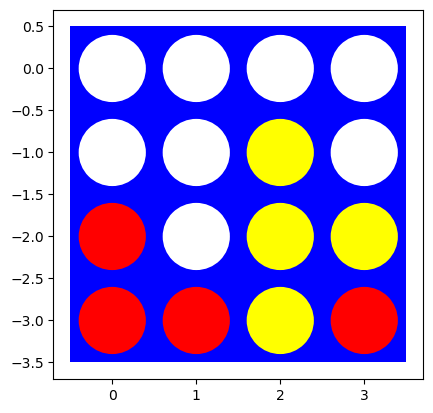

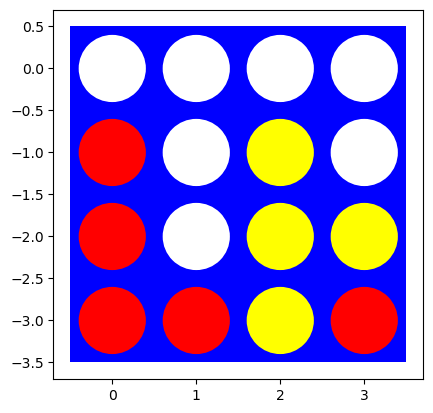

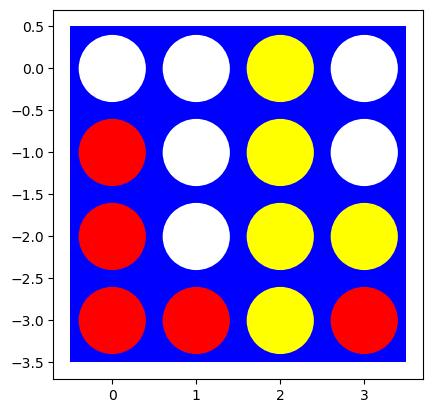

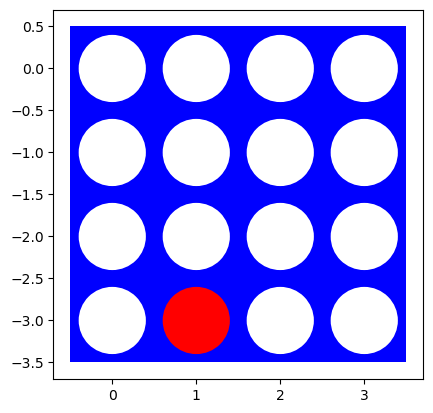

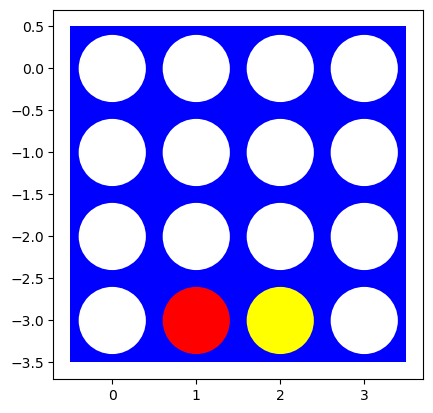

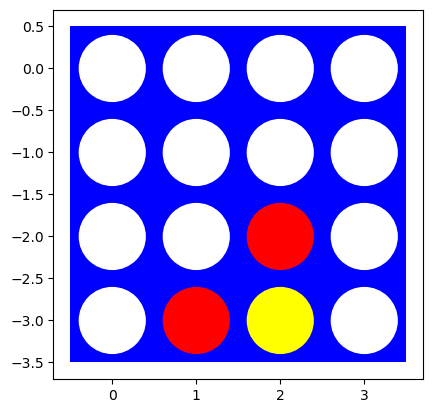

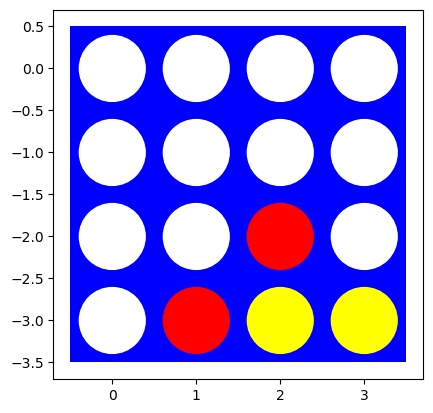

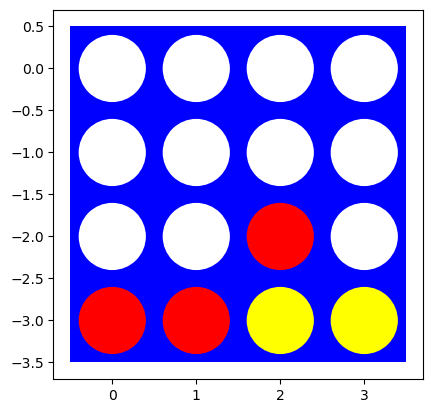

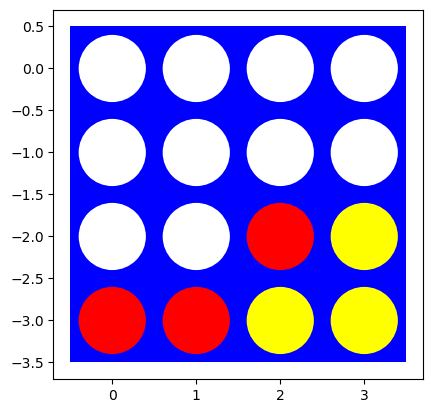

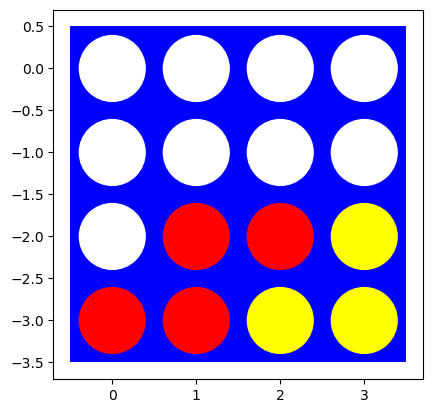

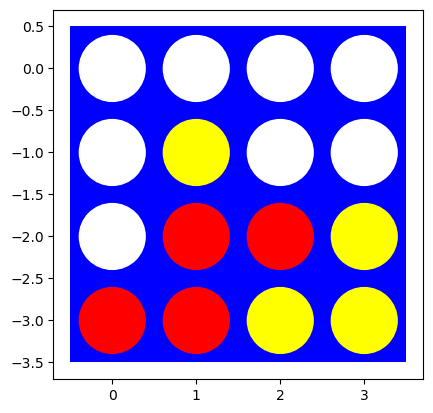

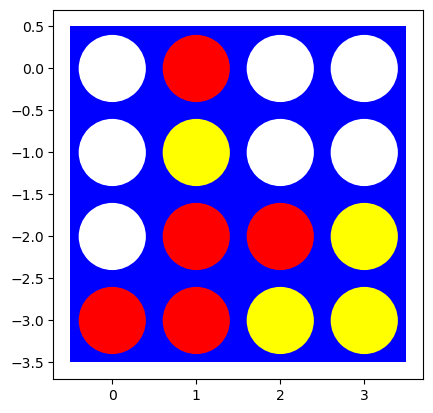

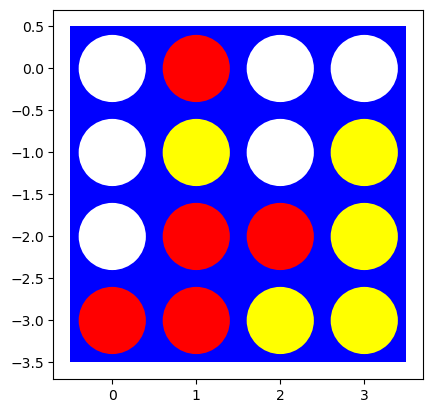

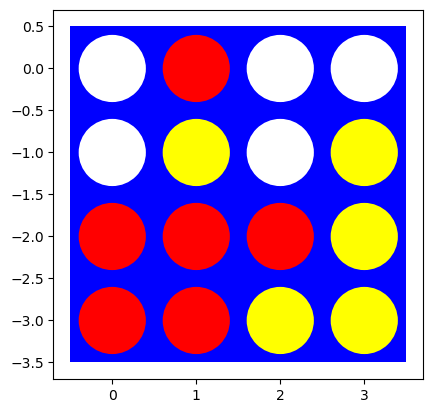

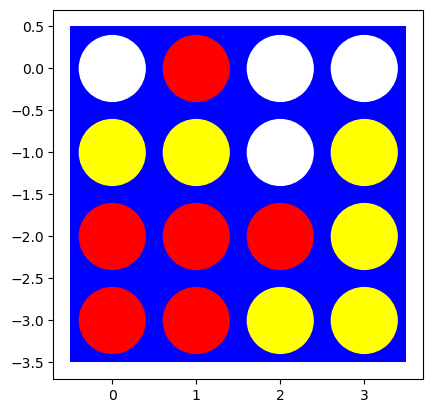

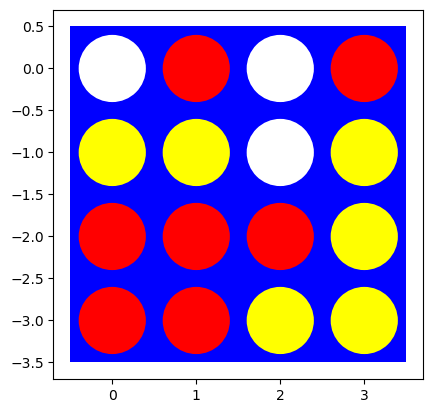

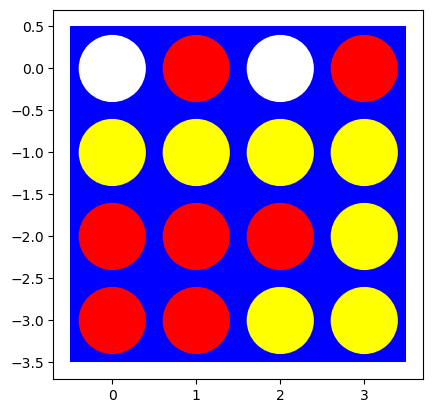

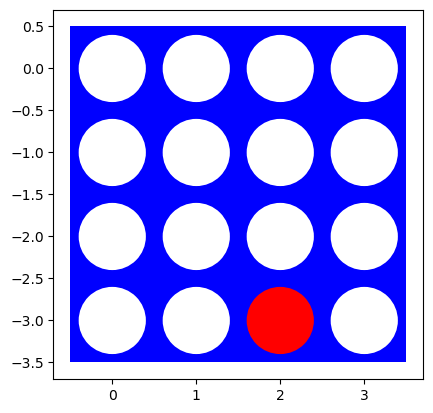

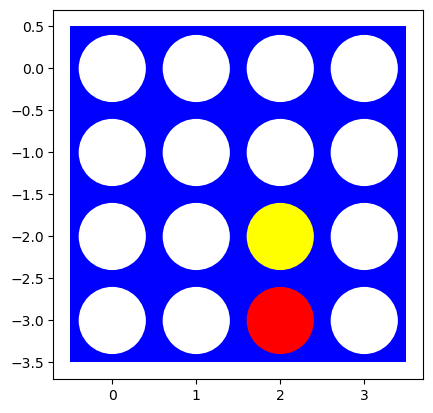

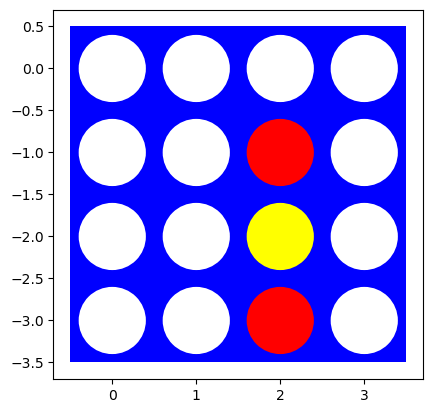

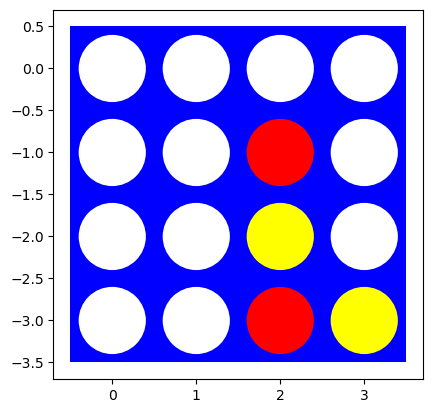

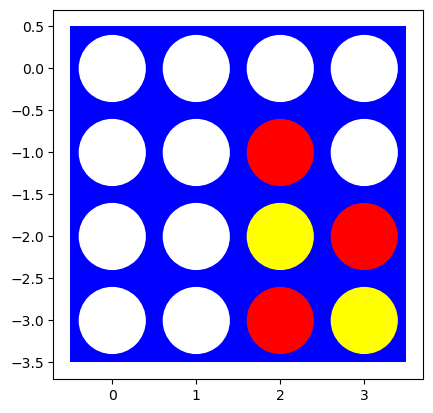

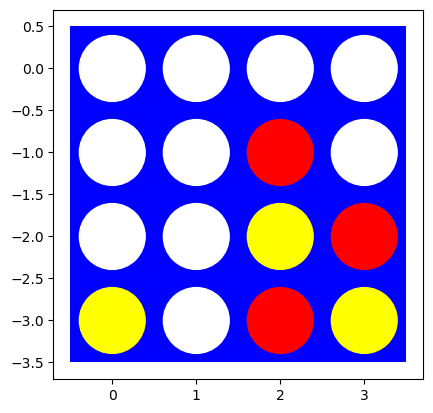

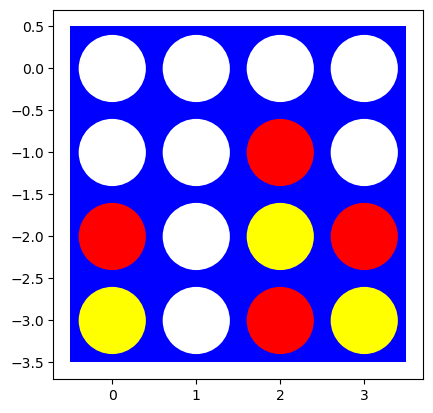

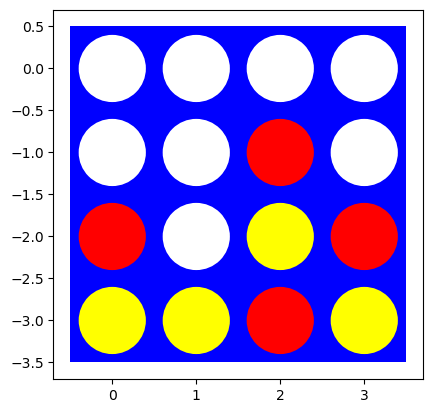

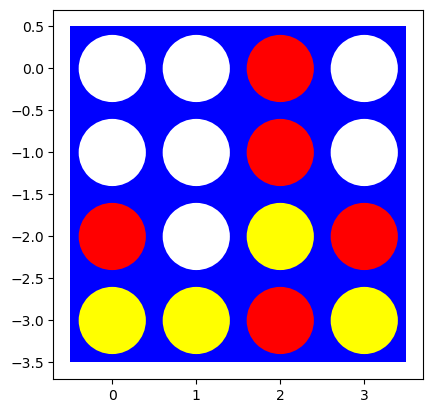

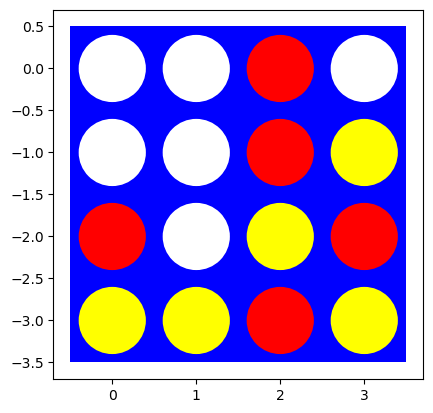

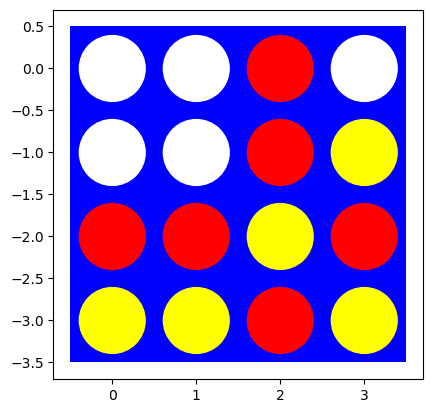

KeyboardInterrupt: 

In [160]:
# play the game 
# TODO - able to play with 1000 rounds but double check that the board is not placing pieces in already taken spots 
win_red, win_yellow = play() 

In [ ]:
# calculate probabilities 
# TODO - do these prob. make sense? Something is broken because yellow is way too high? 
print("Red won: ", win_red)

print("Yellow won: ", win_yellow)

Red won:  266
Yellow won:  734


Yellow has a higher win rate and this is not expected.... may be a bug with the code? 

## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Important Notes:__
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [ ]:
# Your code/ answer goes here.

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [ ]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
# Your code/ answer goes here.

### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [ ]:
# Your code/ answer goes here.

### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

In [ ]:
# Your code/ answer goes here.

# describe different opening moves etc. 

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [ ]:
# Your code/ answer goes here.

## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function.

In [ ]:
# Your code/ answer goes here.

### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [ ]:
# Your code/ answer goes here.

Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [ ]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
# Your code/ answer goes here.

### Playtime [5 points]

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [ ]:
# Your code/ answer goes here.

## Challenge task [up to +10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [ ]:
# Your code/ answer goes here.

### Best First Move

Use Oure Monte Carlo Search to determine what the best first move is? Describe under what assumptions this is the "best" first move.  

In [ ]:
# Your code/ answer goes here.